`Libraries and Functions`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [2]:
def PrintUniqueforallCols(temp_df):
    for col in temp_df:
        print(col, temp_df[col].unique())

In [3]:
def ConvertAllColsToInt(temp_df):
    for col in temp_df:
        temp_df[col] =  temp_df[col].astype(int)

In [4]:
def untampered_statistics(data_Frame):
    print(data_Frame.info())
    print()
    print(data_Frame.describe())
    print()
    print("Unique values for each variable:")
    print(PrintUniqueforallCols(data_Frame))
    print()
    print("Rows, Columns")
    print(data_Frame.shape)
    print()
    print("Number of rows with null values: ")
    print(len(data_Frame) - len(data_Frame.dropna()))

In [5]:
def drawDisPlot(temp_df):
    plt.figure(figsize=(20, 5))
    i_count = 1
    sns.set_style("darkgrid")
    for col in temp_df:
        plt.subplot(1,3,i_count)
        fig = sns.distplot(temp_df[col], kde_kws={'bw': 1})
        i_count = i_count+1
    plt.suptitle('Distribution Plots')
    plt.show()

In [6]:
def drawScatterPlot(temp_df):
    plt.figure(figsize=(20,5))
    i_count =1
    for col in ["JointTemp","LeakCheckPress"]:
        ax = plt.subplot(1,2,i_count)
        clr = np.where(temp_df["RingsInDistress"]>=1,'r','b')
        plt.scatter(temp_df[col], temp_df["RingsInDistress"],c=clr, label=col)
        plt.ylabel("O-Rings in Distress")
        plt.xlabel(col)
        i_count = i_count+1
        ax.grid(True, linestyle='--')
        plt.legend(["Blue = 0, Red = > 1+ O-Rings"])
    plt.suptitle('Scatter Plots')
    plt.show()

In [7]:
def drawCorrHeatmap(temp_df):
    plt.figure(figsize=(6,4))
    cols = temp_df.corr()['RingsInDistress'].head().index
    cm = np.corrcoef(temp_df[cols].values.T)
    sns.set(font_scale=1)
    hm = sns.heatmap(cm, annot=True, yticklabels=cols.values, xticklabels=cols.values)
    plt.suptitle('Correlation Heatmap')
    plt.show()

`First Model`

In [8]:
erosion_df =  pd.read_csv("o-ring-erosion-only.csv", header = None, encoding = "ISO-8859-1", low_memory=False)
erosion_df.columns = ['RingsAtRisk','RingsInDistress','JointTemp','LeakCheckPress','TemporalOrder']
erosion_df.head(5)

,RingsAtRisk,RingsInDistress,JointTemp,LeakCheckPress,TemporalOrder
0,6.0,0.0,66.0,50,1.0
1,6.0,1.0,70.0,50,2.0
2,6.0,0.0,69.0,50,3.0
3,6.0,0.0,68.0,50,4.0
4,6.0,0.0,67.0,50,5.0


In [9]:
untampered_statistics(erosion_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RingsAtRisk      23 non-null     float64
 1   RingsInDistress  23 non-null     float64
 2   JointTemp        23 non-null     float64
 3   LeakCheckPress   24 non-null     object 
 4   TemporalOrder    23 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.1+ KB
None

       RingsAtRisk  RingsInDistress  JointTemp  TemporalOrder
count         23.0        23.000000  23.000000       23.00000
mean           6.0         0.304348  69.565217       12.00000
std            0.0         0.558796   7.057080        6.78233
min            6.0         0.000000  53.000000        1.00000
25%            6.0         0.000000  67.000000        6.50000
50%            6.0         0.000000  70.000000       12.00000
75%            6.0         0.500000  75.000000       17.50000
max            6.0    

In [10]:
#Drop rows with null values
erosion_df= erosion_df.dropna(subset=erosion_df.columns.values)

#Convert float values to integers
ConvertAllColsToInt(erosion_df)

#Drop columns Rings at Risk and Temporal Order
erosion_df = erosion_df.drop("RingsAtRisk", axis=1)
erosion_df = erosion_df.drop("TemporalOrder", axis=1)


In [11]:
erosion_df.head(5)

,RingsInDistress,JointTemp,LeakCheckPress
0,0,66,50
1,1,70,50
2,0,69,50
3,0,68,50
4,0,67,50


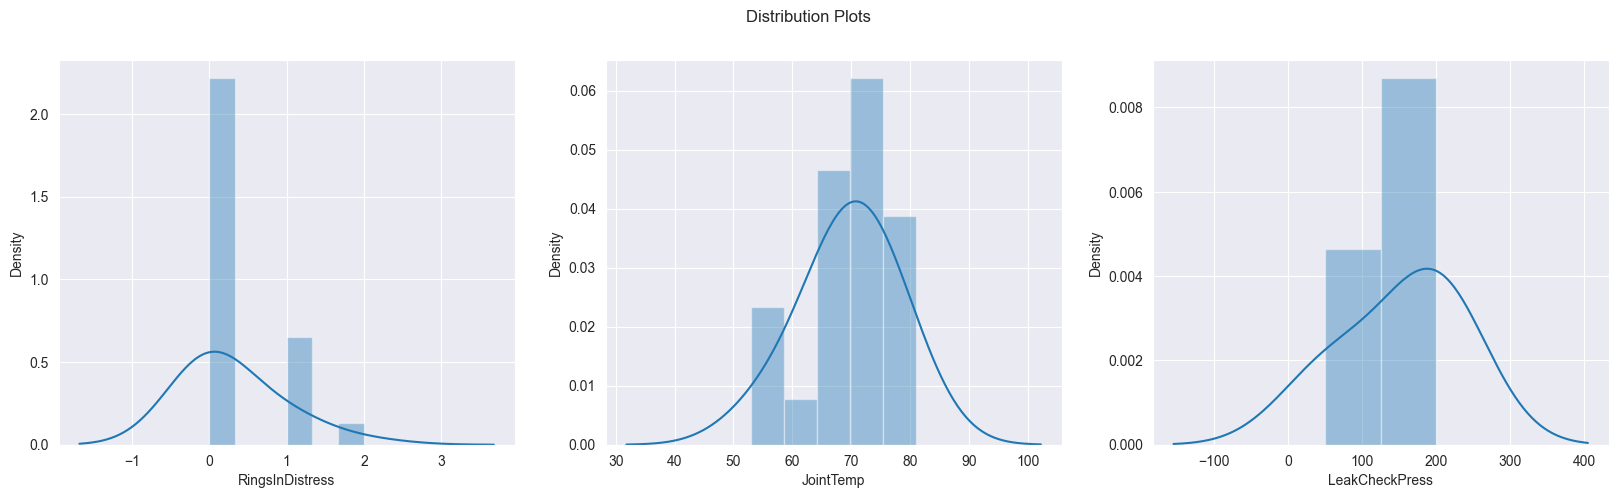

In [12]:
drawDisPlot(erosion_df)

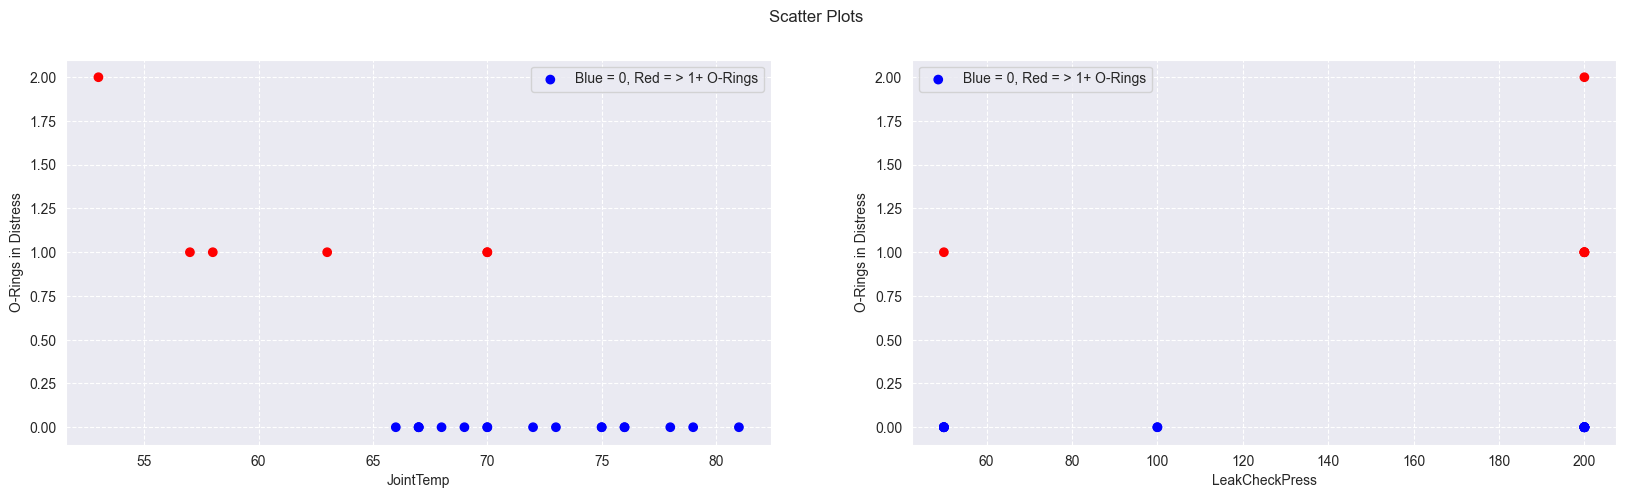

In [13]:
drawScatterPlot(erosion_df)

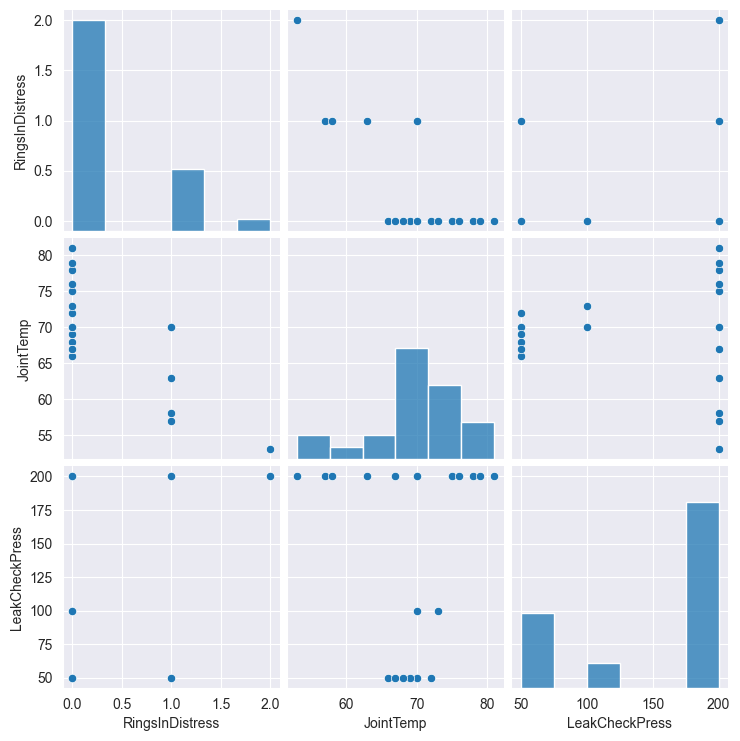

In [14]:
sns.pairplot(erosion_df)
plt.show()

In [15]:
#Train - Test Split for the Dataset, Stratify to have a "non-biased" split for the model
np.random.seed(0)
train_lm_df, test_lm_df = train_test_split(erosion_df, train_size=0.7, test_size=0.3, random_state=42)

#not workable yet
#train_lm_df, test_lm_df = train_test_split(erosion_df, train_size=0.7, test_size=0.3, random_state=42, stratify=erosion_df['RingsInDistress'])

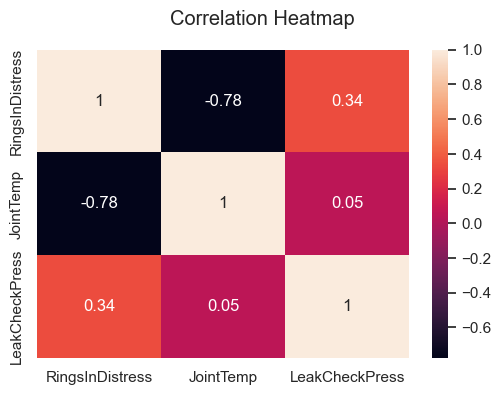

In [16]:
drawCorrHeatmap(train_lm_df)

`Second Model`

In [17]:
erosion_or_blowby_df =  pd.read_csv("o-ring-erosion-or-blowby.csv",header=None, encoding = "ISO-8859-1", low_memory=False)
erosion_or_blowby_df.columns = ['RingsAtRisk','RingsInDistress','JointTemp','LeakCheckPress','TemporalOrder']
erosion_or_blowby_df.head(5)

,RingsAtRisk,RingsInDistress,JointTemp,LeakCheckPress,TemporalOrder
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


In [18]:
untampered_statistics(erosion_or_blowby_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   RingsAtRisk      23 non-null     int64
 1   RingsInDistress  23 non-null     int64
 2   JointTemp        23 non-null     int64
 3   LeakCheckPress   23 non-null     int64
 4   TemporalOrder    23 non-null     int64
dtypes: int64(5)
memory usage: 1.0 KB
None

       RingsAtRisk  RingsInDistress  JointTemp  LeakCheckPress  TemporalOrder
count         23.0        23.000000  23.000000       23.000000       23.00000
mean           6.0         0.391304  69.565217      152.173913       12.00000
std            0.0         0.656376   7.057080       68.221332        6.78233
min            6.0         0.000000  53.000000       50.000000        1.00000
25%            6.0         0.000000  67.000000       75.000000        6.50000
50%            6.0         0.000000  70.000000      200.000000       12.00000


In [19]:
y_train_lm = train_lm_df.pop("RingsInDistress")
X_train_lm = train_lm_df

In [20]:
y_test_lm = test_lm_df.pop("RingsInDistress")
X_test_lm = test_lm_df

In [21]:
X_train_lm = sm.add_constant(X_train_lm)
X_test_lm = sm.add_constant(X_test_lm)

In [22]:
lm1 = sm.OLS(y_train_lm, X_train_lm).fit()

In [23]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RingsInDistress   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     18.88
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           0.000143
Time:                        15:51:24   Log-Likelihood:                -2.5004
No. Observations:                  16   AIC:                             11.00
Df Residuals:                      13   BIC:                             13.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4394      0.840      5.287      0.000       2.625       6.253
JointTemp         -0.0666      0.012     -5.653      0.000      -0.092      -0.041
LeakCheckPress     0.0032      0.001      2.686      0.019       0.001       0.006
==============================================================================
Omnibus:                        0.956   Durbin-Watson:                   2.422
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.056
Skew:                          -0.010   Prob(JB):                        0.972
Kurtosis:                       3.290   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
press = [0, 50, 100, 200]
T = 31
for P in press:
    y = 3.4339 - T* 0.0534 + P*0.0046
    print("No. of rings that will fail at 31 F and {} psi = {}".format(P,int(y)))

No. of rings that will fail at 31 F and 0 psi = 1
No. of rings that will fail at 31 F and 50 psi = 2
No. of rings that will fail at 31 F and 100 psi = 2
No. of rings that will fail at 31 F and 200 psi = 2
